<a href="https://colab.research.google.com/github/vuyyurus74/modern-AI/blob/main/Home_Price_Prediction_Modern_AI_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modern AI Pro: Regression techniques to predict home prices
We are going to use a simple dataset to learn linear regression. This is the foundation of machine learning. https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

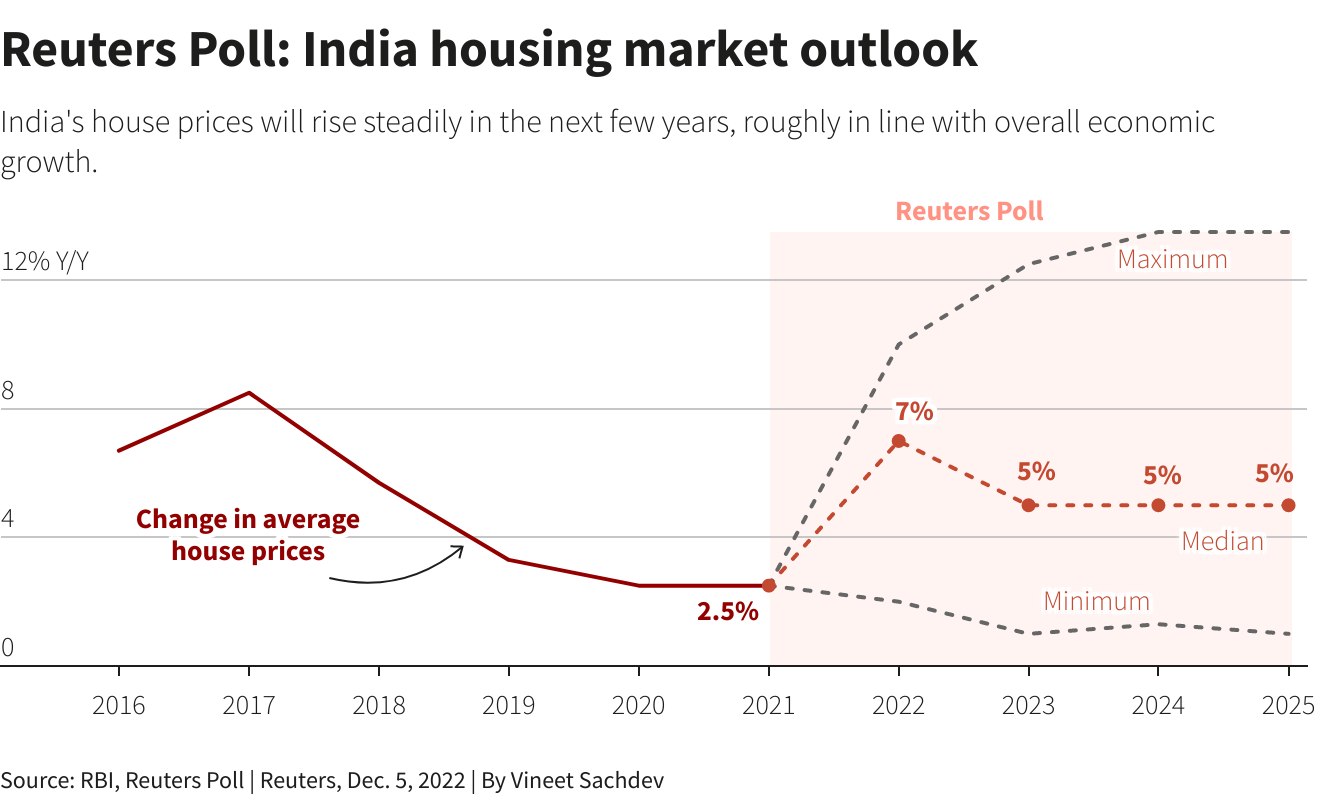

## Step 1: Download the data from Kaggle and load into the datafame

In [8]:
from google.colab import userdata
from os import environ

environ["KAGGLE_KEY"]      = userdata.get('KAGGLE_KEY')
environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

! pip -q install kaggle
! kaggle competitions download -c house-prices-advanced-regression-techniques
! unzip /content/house-prices-advanced-regression-techniques.zip

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 526MB/s]
Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [9]:
import pandas as pd
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
df.columns.to_list()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

## Step 2: Visualize the data

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

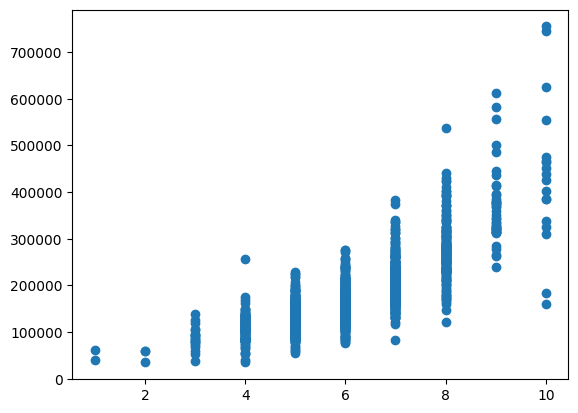

In [13]:
plt.scatter(df['OverallQual'],df['SalePrice'])

In [30]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col].dtype):
    if df[col].isnull().any():
      df[col].fillna(df[col].median(), inplace=True)
  else:
    df[col] = LabelEncoder().fit_transform(df[col])

df

/tmp/ipython-input-163801837.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-163801837.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


<Axes: >

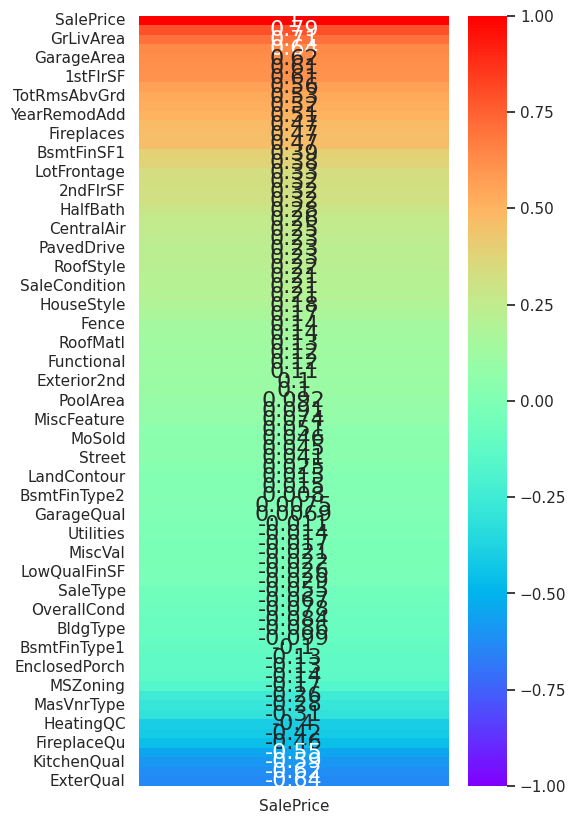

In [31]:
import seaborn as sns
sns.set()

top_features = df.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow', annot=True,annot_kws={"size": 16}, vmin=-1)


## Step 3: Setup the Machine Learning

In [35]:
y = df["SalePrice"]
X = df.drop("SalePrice",axis="columns")
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,0,3,4,4,0,2,2008,8,4
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,0,3,4,4,0,5,2007,8,4
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,0,3,4,4,0,9,2008,8,4
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,0,3,4,4,0,2,2006,8,0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,0,3,4,4,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,0,3,4,4,0,8,2007,8,4
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,0,3,2,4,0,2,2010,8,4
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,0,3,0,2,2500,5,2010,8,4
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,0,3,4,4,0,4,2010,8,4


In [36]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,3,70.0,8400,1,2,3,3,0,...,0,0,3,4,4,0,6,2010,8,4
1066,1067,60,3,59.0,7837,1,2,0,3,0,...,0,0,3,4,4,0,5,2009,8,4
638,639,30,3,67.0,8777,1,2,3,3,0,...,0,0,3,2,4,0,5,2008,8,4
799,800,50,3,60.0,7200,1,2,3,3,0,...,0,0,3,2,4,0,6,2007,8,4
380,381,50,3,50.0,5000,1,1,3,3,0,...,0,0,3,4,4,0,5,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,3,78.0,9317,1,2,0,3,0,...,0,0,3,4,4,0,3,2007,8,4
1130,1131,50,3,65.0,7804,1,2,3,3,0,...,0,0,3,2,4,0,12,2009,8,4
1294,1295,20,3,60.0,8172,1,2,3,3,0,...,0,0,3,4,4,0,4,2006,8,4
860,861,50,3,55.0,7642,1,2,3,3,0,...,0,0,3,0,4,0,6,2007,8,4


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select only numeric columns for scaling
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [39]:
X_test_scaled

array([[ 0.38123238, -0.8667643 , -0.05479609, ..., -1.37548612,
         0.31666197,  0.20177167],
       [ 0.88218848,  0.07410996, -0.05479609, ...,  1.65006527,
         0.31666197,  0.20177167],
       [-0.74533088, -0.63154574,  1.58627662, ...,  1.65006527,
         0.31666197,  0.20177167],
       ...,
       [ 0.16956079,  0.07410996, -0.05479609, ...,  0.13728958,
         0.31666197,  0.20177167],
       [-0.18557711,  0.30932853, -0.05479609, ...,  0.89367742,
         0.31666197,  0.20177167],
       [-0.01859174, -0.8667643 , -0.05479609, ...,  0.89367742,
         0.31666197,  0.20177167]])

In [40]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,893,20,3,70.0,8414,1,2,3,3,0,...,0,0,3,2,4,0,2,2006,8,4
1105,1106,60,3,98.0,12256,1,2,0,3,0,...,0,0,3,4,4,0,4,2010,8,4
413,414,30,4,56.0,8960,1,0,3,3,0,...,0,0,3,4,4,0,3,2010,8,4
522,523,50,4,50.0,5000,1,2,3,3,0,...,0,0,3,4,4,0,10,2006,8,4
1036,1037,20,3,89.0,12898,1,2,0,1,0,...,0,0,3,4,4,0,9,2009,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,30,4,50.0,5925,1,2,3,0,0,...,0,0,3,2,4,0,3,2007,8,2
1361,1362,20,3,124.0,16158,1,2,0,2,0,...,0,0,3,4,4,0,6,2009,8,4
802,803,60,3,63.0,8199,1,2,3,3,0,...,0,0,3,4,4,0,10,2008,8,4
651,652,70,3,60.0,9084,1,2,3,3,0,...,0,0,3,2,4,0,10,2009,8,4


In [41]:
from sklearn.linear_model import LinearRegression
trainer = LinearRegression()
trainer.fit(X_train,y_train)

LinearRegression()

## Step 4: Score and Understand

In [42]:
trainer.score(X_test,y_test)

0.8437676047326118

In [43]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(trainer, file)

In [44]:
print("Coefficients (slopes) of the parameters:")
for feature, coef in zip(trainer.feature_names_in_, trainer.coef_):
    print(f"{feature}: {coef}")

Coefficients (slopes) of the parameters:
Id: -2.6944940824929096
MSSubClass: -132.06223627528462
MSZoning: -2096.941999911039
LotFrontage: -257.1477298263559
LotArea: 0.35867566015103236
Street: 19024.521679558362
Alley: 4500.218072045673
LotShape: -1072.6486552612232
LandContour: 3094.0074311101507
Utilities: -56222.54698151965
LotConfig: 81.38545584308969
LandSlope: 10953.99675049981
Neighborhood: 414.18439214510624
Condition1: -801.4885662992046
Condition2: -10890.935089723807
BldgType: -2266.987144179415
HouseStyle: -880.8651430943196
OverallQual: 10856.868166438857
OverallCond: 5063.346814082677
YearBuilt: 215.26366777822415
YearRemodAdd: 47.59131221908967
RoofStyle: 2550.650603726298
RoofMatl: 5551.666533061562
Exterior1st: -1504.9323147932505
Exterior2nd: 832.6697177834416
MasVnrType: 4678.487135731586
MasVnrArea: 36.83422671192807
ExterQual: -8423.239278007308
ExterCond: 388.3074330450572
Foundation: 831.0597031809599
BsmtQual: -9727.101029281392
BsmtCond: 3315.559375890983
Bsm

In [45]:
# Let's pick a random house and check the results
import random
my_choice = random.randrange(len(X_test))
print(my_choice)
print("Actual price: ", y_test.iloc[my_choice], "Predicted Price: ", trainer.predict(X_test.iloc[[my_choice]]))

105
Actual price:  156500 Predicted Price:  [178945.3803628]
